# Project: Investigate a Dataset (TMDb movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this dataset we have access to information about 1000 movies in the last 50 years including their budget,
> revenue, cast, popularity, genre etc. By analysing this dataset we would be able to answer the following questions:
>
><li> Profits of the movies over the past years
><li> Which movie made the most profit
><li> Movie production tren over years
><li> Mean popularity of movies in years
><li> Percentage of Genres in top 10 profitable movies

>

In [18]:
#import all the required packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.



<a id='wrangling'></a>
## Data Wrangling

> Time to gather the data, access to them and start cleaning our data before we start the analysis. Find the Null values and drop them and missing data. 
> Check the types of the items. First we need to load the dataset and explore some information. 


In [ ]:
# Load your data and
# print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies_data.csv')
df.info()

### Data Cleaning
> Now we need to have a deeper look into the dataset in order to clean the data, by removing unwanted data,
> duplicates rows and Null values. First I decided to get rid of unwanted columns in my analysis.

In [ ]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
unwanted_columns = ['id','imdb_id','budget','revenue','homepage','tagline','overview','release_date']
df.drop(unwanted_columns, inplace= True, axis=1)

In [ ]:
df.info()

> Now in the next two cells I'll remove the duplicates and null values in the data set

In [ ]:
#Check for duplicates columns
sum(df.duplicated())

df.drop_duplicates(inplace= True)

In [ ]:
#drop the null values in the dataset
df.dropna(inplace= True)

In [19]:
#change the types of some of the values
df[['popularity', 'vote_average', 'budget_adj', 'revenue_adj']] = df[['popularity', 'vote_average',
                                                                             'budget_adj', 'revenue_adj']].astype(int)


> make a new column by calculating the net_profit

In [20]:
#add a column for net profit by subtracting the budget from revenue  
df['net_profit'] =  df['revenue_adj'] - df['budget_adj']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   popularity            10865 non-null  int32 
 1   original_title        10865 non-null  object
 2   cast                  10789 non-null  object
 3   director              10821 non-null  object
 4   keywords              9372 non-null   object
 5   runtime               10865 non-null  int64 
 6   genres                10842 non-null  object
 7   production_companies  9835 non-null   object
 8   vote_count            10865 non-null  int64 
 9   vote_average          10865 non-null  int32 
 10  release_year          10865 non-null  int64 
 11  budget_adj            10865 non-null  int32 
 12  revenue_adj           10865 non-null  int32 
 13  net_profit            10865 non-null  int32 
dtypes: int32(5), int64(3), object(6)
memory usage: 1.0+ MB


In [21]:
#save a new clean data set
df.to_csv('clean_tmdb_movie_data.csv', index= False)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned the data, I can do exploration and make some visualizations in order to be 
> able to answer the above questions. First explore the histograms of my clean data.

In [23]:
#load the data

df_clean = pd.read_csv('clean_tmdb_movie_data.csv')

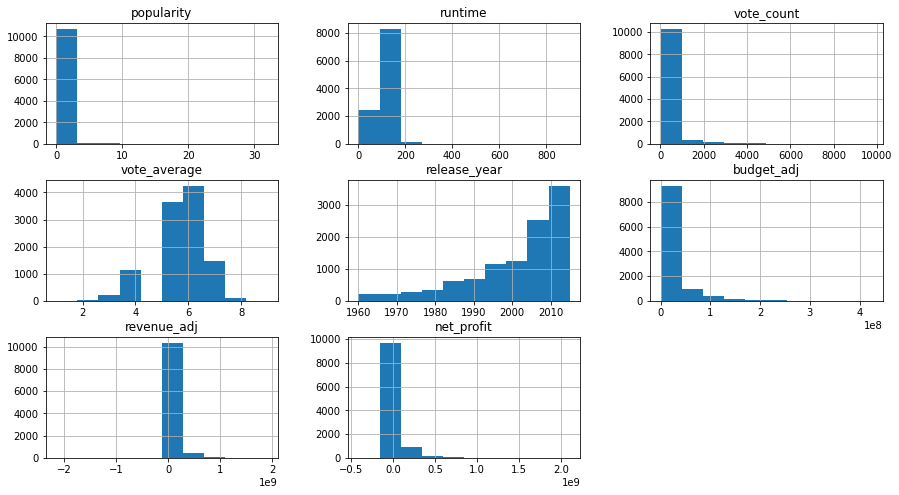

In [24]:
# Explore what the histogram of the data looks like
df_clean.hist(figsize=(15,8));

### Research Question 1 (Profits of the movies over the past years)

> I made a function in order to plot the profit of the movie over the past years. We can see that the profit has been
> grown in the last 50 years or so, we also would be able to see the years with minimum and maximum profit.  

In [25]:
def trend(x,y):
    profit_trend = df.groupby(x)[y].sum()
    plt.figure(figsize=(7,7))
    plt.plot(profit_trend, color='g', linestyle= '-', linewidth= 3)
    plt.xlabel('Released year', fontsize= 12)
    plt.ylabel('Net profit', fontsize= 12)
    plt.title('Net Profit Trend of the movies in years', fontsize=12)  
    return plt
    

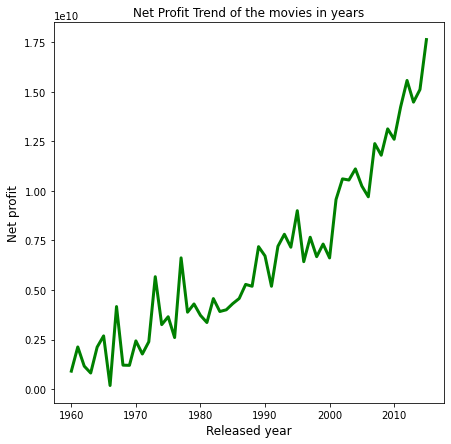

In [26]:
profit_plot = trend('release_year','net_profit')


### Research Question 2  (what is the information of the most profitable movie in the dataset?)
> I wrote a simple query in order to find the information about most profitable movie in the dataset.

In [27]:
movie_max_profit = df.query('net_profit == net_profit.max()')
movie_max_profit

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
10594,2,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,exorcism|holy water|religion and supernatural|...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1113,7,1973,39289276,-2147483648,2108194372


### Research Question 3  (Movie production trend over years)
> There are nubmers of production in each year, so we can find the movie production in the past years, it shows that
> movie production has been increased over the years however it dropped a bit in the last year.

In [28]:
df_1 = df_clean.groupby('release_year').count()['director']

In [29]:
#find the year with least production in the whole dataset
df_1[df_1==df_1.min()]

release_year
1961    31
1969    31
Name: director, dtype: int64

In [30]:
def production_trend(x,y):
    profit_trend = df_clean.groupby(x)[y].count()
    plt.figure(figsize=(7,7))
    plt.plot(profit_trend, color='b', linestyle= '-', linewidth= 3)
    plt.xlabel('Released year', fontsize= 12)
    plt.ylabel('number production', fontsize= 12)
    plt.title('movie production trend in years', fontsize=12)  
    return plt


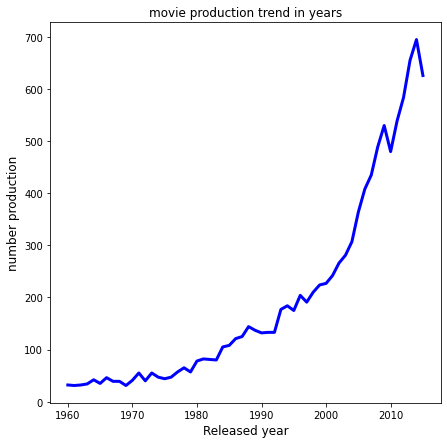

In [31]:
production_plot = production_trend('release_year','director')


### Research Question 4  (Mean popularity of movies in years)
> The next plot depicts the popularity trend of movies over the years 

In [32]:
df_2 = df_clean.groupby('release_year')['popularity'].mean()

In [33]:
def popularity_trend(x,y):
    profit_trend = df_clean.groupby(x)[y].mean()
    plt.figure(figsize=(7,7))
    plt.plot(profit_trend, color='r', linestyle= '-', linewidth= 3)
    plt.xlabel('Released year', fontsize= 12)
    plt.ylabel('Mean popularity', fontsize= 12)
    plt.title('movie production trend in years', fontsize=12)  
    return plt

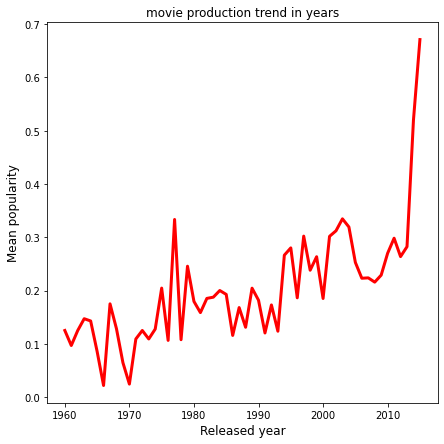

In [34]:
popularity_plot = popularity_trend('release_year','popularity') 

### Research Question 5 (Percentage of Genres in top 20 profitable movies)
> I tried to find the percentage of genres in top 20 profitable movies through the whole dataset. Since there are
> different genres for each movie i first need to separate all the genres and put them in a separate column. 

In [35]:
# Then split the genres column by the "|" character and make each genre a new colu
genres = df_clean['genres'].str.split('|', expand=True).rename(columns={0:'genre_1', 1:'genre_2', 2:'genre_3',
                                                                        3:'genre_4',4:'genre_5'})
genres

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10860,Documentary,None,None,None,None
10861,Action,Adventure,Drama,None,None
10862,Mystery,Comedy,None,None,None
10863,Action,Comedy,None,None,None


In [36]:
#drop the genres column from the main dataset
df_clean.drop('genres', axis=1, inplace=True)

In [37]:
#merge the new columns to the dataset
df_clean = df_clean.merge(genres, left_index= True, right_index= True, how='inner')
df_clean

,popularity,original_title,cast,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,genre_1,genre_2,genre_3,genre_4,genre_5
0,32,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6,2015,137999939,1392445893,1254445954,Action,Adventure,Science Fiction,Thriller,None
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7,2015,137999939,348161292,210161353,Action,Adventure,Science Fiction,Thriller,None
2,13,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6,2015,101199955,271619025,170419070,Adventure,Science Fiction,Thriller,None,None
3,11,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7,2015,183999919,1902723130,1718723211,Action,Adventure,Science Fiction,Fantasy,None
4,9,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Universal Pictures|Original Film|Media Rights ...,2947,7,2015,174799923,1385748801,1210948878,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Bruce Brown Films,11,7,1966,0,0,0,Documentary,None,None,None,None
10861,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Cherokee Productions|Joel Productions|Douglas ...,20,5,1966,0,0,0,Action,Adventure,Drama,None,None
10862,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mosfilm,11,6,1966,0,0,0,Mystery,Comedy,None,None,None
10863,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Benedict Pictures Corp.,22,5,1966,0,0,0,Action,Comedy,None,None,None


In [38]:
#take the top 20 profitable movies from the dataset
df_top_20_profit = df_clean.nlargest(20, 'net_profit')
df_top_20_profit

,popularity,original_title,cast,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,genre_1,genre_2,genre_3,genre_4,genre_5
10593,2,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,exorcism|holy water|religion and supernatural|...,122,Warner Bros.|Hoya Productions,1113,7,1973,39289276,-2147483648,2108194372,Drama,Horror,Thriller,None,None
1329,12,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7,1977,39575591,-2147483648,2107908057,Adventure,Action,Science Fiction,None,None
1386,9,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Ingenious Film Partners|Twentieth Century Fox ...,8458,7,2009,240886902,-2147483648,1906596746,Action,Adventure,Fantasy,Science Fiction,None
9805,2,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124,Universal Pictures|Zanuck/Brown Productions,1415,7,1975,28362748,1907005842,1878643094,Horror,Thriller,Adventure,None,None
5230,4,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Paramount Pictures|Twentieth Century Fox Film ...,4654,7,1997,271692064,-2147483648,1875791584,Drama,Romance,Thriller,None,None
8888,2,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,farewell|homesickness|nasa|extraterrestrial te...,115,Universal Pictures|Amblin Entertainment,1830,7,1982,23726245,1791694309,1767968064,Science Fiction,Adventure,Family,Fantasy,None
3,11,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7,2015,183999919,1902723130,1718723211,Action,Adventure,Science Fiction,Fantasy,None
8093,1,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,cheating|new identity|computer virus|chase|com...,114,Columbia Pictures,201,5,1995,31481271,1583049536,1551568265,Crime,Drama,Mystery,Thriller,Action
10109,2,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,puppy|animation|dog|dalmatian,79,Walt Disney Productions,913,6,1961,29179444,1574814740,1545635296,Adventure,Animation,Comedy,Family,None
7308,5,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,rebel|asteroid|space battle|snow storm|space c...,124,Lucasfilm|Twentieth Century Fox Film Corporation,3954,8,1980,47628661,1424626188,1376997527,Adventure,Action,Science Fiction,None,None


In [39]:
#put those movie in a different dataset
df_genre = df_top_20_profit.filter(['genre_1','genre_2', 'genre_3', 'genre_4', 'genre_5'], axis=1)
df_genre

,genre_1,genre_2,genre_3,genre_4,genre_5
10593,Drama,Horror,Thriller,None,None
1329,Adventure,Action,Science Fiction,None,None
1386,Action,Adventure,Fantasy,Science Fiction,None
9805,Horror,Thriller,Adventure,None,None
5230,Drama,Romance,Thriller,None,None
8888,Science Fiction,Adventure,Family,Fantasy,None
3,Action,Adventure,Science Fiction,Fantasy,None
8093,Crime,Drama,Mystery,Thriller,Action
10109,Adventure,Animation,Comedy,Family,None
7308,Adventure,Action,Science Fiction,None,None


In [40]:
#unpivots a DataFrame from wide format to long format
df_genre_melt = df_genre.melt()
df_genre_melt


,variable,value
0,genre_1,Drama
1,genre_1,Adventure
2,genre_1,Action
3,genre_1,Horror
4,genre_1,Drama
...,...,...
95,genre_5,None
96,genre_5,None
97,genre_5,None
98,genre_5,None


In [41]:
#groupby the genres by counting them
df_genre_total = df_genre_melt.groupby('value').count()['variable']


In [42]:
#make a new DataFrame with different genres and their quantity
aa = df_genre_total.to_numpy()
bb = df_genre_melt['value'].unique()
cc = bb[bb != np.array(None)]
df_genres = pd.DataFrame((cc, aa)).T
df_genres.columns = ['genre','quantity']
df_genres

,genre,quantity
0,Drama,10
1,Adventure,14
2,Action,3
3,Horror,1
4,Science Fiction,3
5,Crime,5
6,Family,5
7,Thriller,5
8,Romance,2
9,Animation,1


In [43]:
#add a percentage column to the dataset to explain the percentage of each genre
df_genres['percentage'] = pd.DataFrame((df_genres['quantity']/df_genres['quantity'].sum())*100)
df_genres

,genre,quantity,percentage
0,Drama,10,15.3846
1,Adventure,14,21.5385
2,Action,3,4.61538
3,Horror,1,1.53846
4,Science Fiction,3,4.61538
5,Crime,5,7.69231
6,Family,5,7.69231
7,Thriller,5,7.69231
8,Romance,2,3.07692
9,Animation,1,1.53846


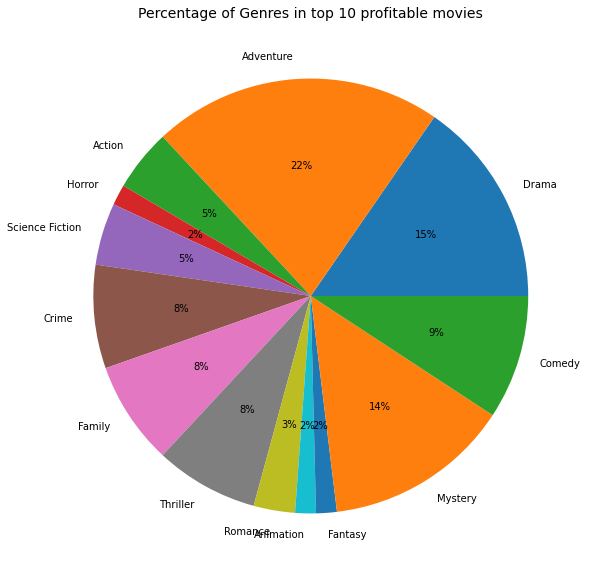

In [44]:
#plot the pie chart to show the distribution of different genre in the top 20 profitable movies in the dataset
plt.figure(figsize= (10,10))
plt.pie(df_genres['percentage'], labels= df_genres['genre'], autopct='%1.0f%%')
plt.title('Percentage of Genres in top 10 profitable movies', fontsize = 14);

<a id='conclusions'></a>
## Conclusions

> Throughout this data analysis I explore few question that might be helpful. The profit plot shows that movies profit 
> have been increased in the last years and also the other plot shows the number of production also been increased over
> the years. With the pie chart I showed the contribution of each genre in the top 20 profitable movies, useful
> information for production companies to know by making what genre movie they have more chance to make more profit.
> Other useful information can be extracted from the dataset like the best month to release the movies, or relations
> between budget and profit.   

In [45]:
!jupyter nbconvert --to html Investigate_a_Dataset.ipynb





[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 829290 bytes to Investigate_a_Dataset.html
